In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Load Dataset
data = pd.read_csv("data/Advertising.csv")
data = data.drop(columns = ["Unnamed: 0"])
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


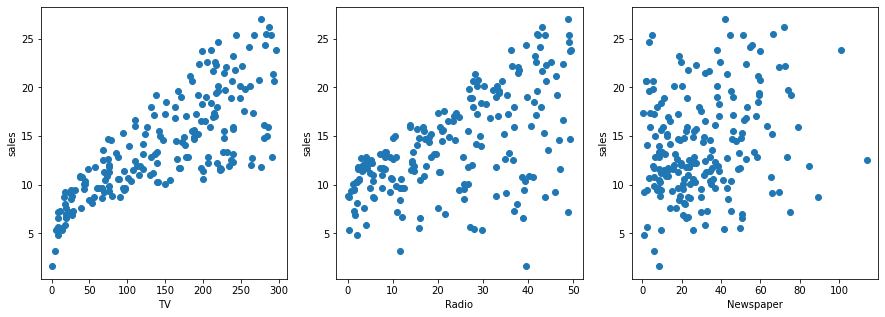

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(data["TV"], data["Sales"])
ax[1].scatter(data["Radio"], data["Sales"])
ax[2].scatter(data["Newspaper"], data["Sales"])

ax[0].set_xlabel("TV")
ax[1].set_xlabel("Radio")
ax[2].set_xlabel("Newspaper")

ax[0].set_ylabel("sales")
ax[1].set_ylabel("sales")
ax[2].set_ylabel("sales")

plt.show()

---
# **Melakukan Linear Regression dengan sklearn**

In [4]:
# linear regression dg sklearn
# Import library
from sklearn.linear_model import LinearRegression

In [5]:
# split input-output

# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = data,
                          target_column = "Sales")

In [6]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [8]:
# split train and test

from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [10]:
X_train.head()

,TV,Radio,Newspaper
24,62.3,12.6,18.3
150,280.7,13.9,37.0
114,78.2,46.8,34.5
33,265.6,20.0,0.3
23,228.3,16.9,26.2


In [11]:
# buat baseline modelnya
# baseline model regresi sama dengan rata-rata dari target

baseline_pred = np.mean(y_train)
print(baseline_pred)

14.095000000000002


In [12]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_train, 
                                  np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

# MSE (mean squared error) sama dengan RSS (Residual Sum of Square)

26.088974999999998


In [13]:
# buat objek dan fitting
# Buat objek
lr = LinearRegression()

In [14]:
# Lakukan cross validation
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(estimator = lr,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

# pengen mse nya lebih kecil, nilainya mendekati ke 0
# untuk memaksimalkan karena keterbatasan sklearn, makanya dipake negatif


In [16]:
scores

array([-1.95519805, -5.9288142 , -2.14412184, -3.06528874, -2.98933228])

In [17]:
lr_cv_scores = - np.mean(scores)
print(lr_cv_scores)

3.2165510231407253


In [18]:
# Lakukan Fitting Data
lr.fit(X = X_train,
       y = y_train)

LinearRegression()

In [19]:
# predict and evaluate!

# buat prediksi
y_pred = lr.predict(X_train)

In [20]:
summary_train_pred = pd.DataFrame({"actual": y_train,
                                   "prediction": y_pred})

summary_train_pred.head()

,actual,prediction
24,9.7,8.103212
150,16.1,18.290549
114,14.6,15.197324
33,17.4,18.763145
23,15.5,16.468096


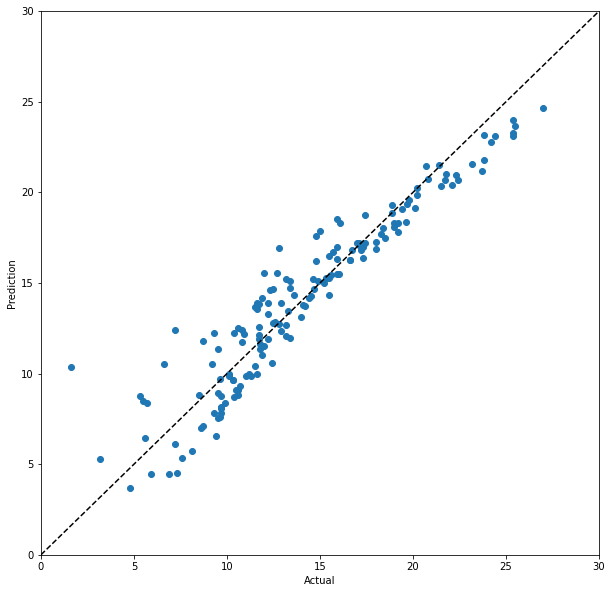

In [21]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
plt.show()

In [22]:
# Cari MSE
prediction_train_mse = mean_squared_error(y_pred, y_train)
print(prediction_train_mse)

2.937624677304987


In [23]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_train_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 88.74 %


In [24]:
# pada data test

# Buat prediksi
y_test_pred = lr.predict(X_test)


In [25]:
summary_test_pred = pd.DataFrame({"actual": y_test,
                                  "prediction": y_test_pred})

summary_test_pred.head()

,actual,prediction
50,11.4,12.589349
127,8.8,6.574663
37,14.7,15.515691
149,10.1,9.761643
19,14.6,14.085603


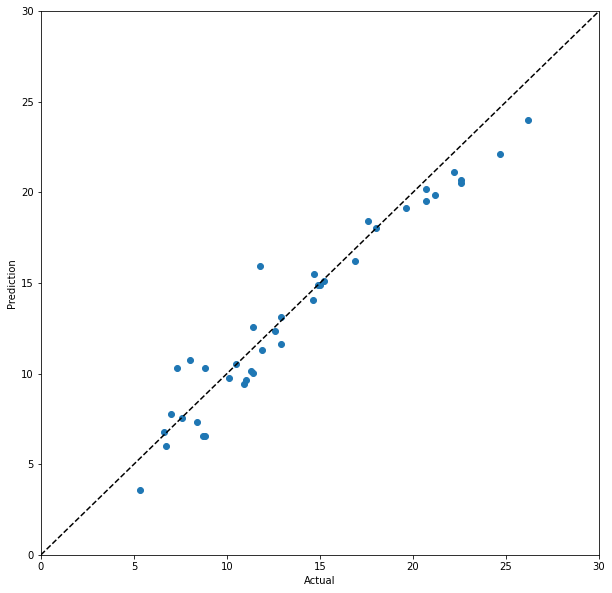

In [26]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_test_pred["actual"], summary_test_pred["prediction"])
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
plt.show()

In [27]:
# Cari MSE
prediction_test_mse = mean_squared_error(y_test_pred, y_test)
print(prediction_test_mse)

2.2030129791028488


In [28]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_test_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 91.56 %


In [29]:
# Koefisien/slope linear regression
lr.coef_

array([ 0.04558897,  0.18653389, -0.00063032])

In [30]:
# Intercept linear regression
lr.intercept_

2.924226787250131

Persamaan Final

$$
\text{sales} = 0.046 \cdot \text{TV} + 0.189 \cdot \text{Radio} - 0.001 \cdot \text{Newspaper} + 2.939
$$

- Akan dapat kenaikan sales kalau tidak melakukan apa-apa (intercept > 0)
- Ads lewat Radio menyumbang kontribusi besar terhadap sales dibandingkan TV & Newspaper
- Ads lewat Newspaper hampir tidak berpengaruh pada Sales

---
# **Melakukan Linear Regression Dari Scratch**

Kita ingin membuat persamaan linear sebagai berikut

$$
\text{sales} = \beta_{1} \cdot \text{TV} + \beta_{2} \cdot \text{Radio} + \beta_{3} \cdot \text{Newspaper} + \beta_{0} + e
$$

Karena kita memiliki data-nya, maka kita buat saja semua persamaan berdasarkan data.

In [31]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Contoh 3 persamaan pertama
​
$$
\begin{align*}
22.1 &= \beta_{1} \cdot 230.1 + \beta_{2} \cdot 37.8 + \beta_{3} \cdot 69.2 + \beta_{0} + e_{1}\\ 
10.4 &= \beta_{1} \cdot 44.5 + \beta_{2} \cdot 45.9 + \beta_{3} \cdot 45.1 + \beta_{0} + e_{2} \\
9.3 &= \beta_{1} \cdot 17.2 + \beta_{2} \cdot 41.3 + \beta_{3} \cdot 69.3 + \beta_{0} + e_{3} \\
&\vdots
\end{align*}
$$
Persamaan di atas, dapat diubah menjadi perkalian Matrix & Vektor
​
$$
\begin{bmatrix}
22.1\\ 
10.4\\ 
9.3\\
\vdots
\end{bmatrix} = 
\begin{bmatrix}
230.1 & 37.8 & 69.2 & 1\\ 
44.5 & 45.9 & 45.1 & 1\\ 
17.2 & 41.3 & 69.3 & 1\\
\vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_{1}\\ 
\beta_{2}\\ 
\beta_{3}\\
\beta_{0}
\end{bmatrix}
+
\begin{bmatrix}
e_{1}\\ 
e_{2}\\ 
e_{3}\\
\vdots
\end{bmatrix}
$$
​
Lebih umum sebagai berikut
​
$$
\begin{bmatrix}
\vdots\\
y\\
\vdots
\end{bmatrix} = 
\begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
\text{TV} & \text{Radio} & \text{Advertising} & 1\\
\vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_{1}\\ 
\beta_{2}\\ 
\beta_{3}\\
\beta_{0}
\end{bmatrix}
+
\begin{bmatrix}
\vdots\\ 
e\\
\vdots
\end{bmatrix}
$$
​
Bisa kita notasikan dalam variable
$$
y = X \cdot \theta + e
$$
Untuk menyelesaikan ini, kita membuat MSE
$$
\begin{align*}
\text{MSE} &= \cfrac{1}{n} \sum_{i=1}^{n} e_{i}^2\\
\text{MSE} &= \cfrac{1}{n} (y-X\cdot\theta)^{2}
\end{align*}
$$
- Yang ingin dicari adalah parameter model, $\theta = \{\beta_{0}, \cdots, \beta_{3}\}$ agar MSE minimum.
- Kita bisa pakai turunan
$$
\begin{align*}
\cfrac{\partial \text{MSE}}{\partial \theta} &= 0 \\
0 &= \cfrac{\partial}{\partial \theta} \cfrac{1}{n} (y-X\cdot\theta)^{2} \\
&= \cfrac{2}{n} (-X^{T}) (y - X \cdot \theta) \\
&= X^{T}y - (X^{T}X)\theta \\
\theta_{\text{optimum}} &= (X^{T}X)^{-1} X^{T} y
\end{align*}
$$
- Disebut juga dengan solusi OLS
- Yuk kita buat


In [32]:
# Buat matriks X_ols
X_ols = np.column_stack([X_train, np.ones(len(X_train))])
X_ols

array([[ 62.3,  12.6,  18.3,   1. ],
       [280.7,  13.9,  37. ,   1. ],
       [ 78.2,  46.8,  34.5,   1. ],
       [265.6,  20. ,   0.3,   1. ],
       [228.3,  16.9,  26.2,   1. ],
       [164.5,  20.9,  47.4,   1. ],
       [177. ,  33.4,  38.7,   1. ],
       [222.4,   4.3,  49.8,   1. ],
       [197.6,  23.3,  14.2,   1. ],
       [109.8,  14.3,  31.7,   1. ],
       [139.5,   2.1,  26.6,   1. ],
       [225.8,   8.2,  56.5,   1. ],
       [293.6,  27.7,   1.8,   1. ],
       [141.3,  26.8,  46.2,   1. ],
       [ 75.5,  10.8,   6. ,   1. ],
       [ 85.7,  35.8,  49.3,   1. ],
       [ 66.1,   5.8,  24.2,   1. ],
       [276.9,  48.9,  41.8,   1. ],
       [120.5,  28.5,  14.2,   1. ],
       [239.3,  15.5,  27.3,   1. ],
       [239.8,   4.1,  36.9,   1. ],
       [ 90.4,   0.3,  23.2,   1. ],
       [175.7,  15.4,   2.4,   1. ],
       [140.3,   1.9,   9. ,   1. ],
       [  8.6,   2.1,   1. ,   1. ],
       [121. ,   8.4,  48.7,   1. ],
       [187.8,  21.1,   9.5,   1. ],
 

In [33]:
# Buat vektor y_ols
y_ols = np.array(y_train)
y_ols

array([ 9.7, 16.1, 14.6, 17.4, 15.5, 14.5, 17.1, 11.7, 16.6, 12.4, 10.3,
       13.4, 20.7, 15.5,  9.9, 13.3,  8.6, 27. , 14.2, 15.7, 12.3,  8.7,
       14.1, 10.3,  4.8, 11.6, 15.6, 11.2, 25.4, 14. , 18.9,  9.7, 12.9,
       11.8, 15.3,  8.5,  5.9, 10.1,  1.6,  8.1, 13.2, 21.4, 11.7,  5.7,
       10.5, 12.8, 22.1, 15.9, 14.9, 20.8, 16.6, 18.4, 25.4, 10.6, 10.6,
        7.2, 12.5, 15. ,  9.3, 17. , 24.2,  7.6, 10.1, 15.9, 20.2, 10.4,
       10.9, 12.2, 18. , 20.1, 16. , 10.6, 11.8, 14.4, 12.2, 11.6, 11.9,
        9.7, 12.2, 19.2, 16.7, 12.5, 17.4, 13.4, 18.5, 12. , 17.1,  7.3,
        9.5, 14.8,  9.4, 10.7, 10.4, 11.3,  9.2, 20.2,  5.5, 12. , 23.8,
       12.9,  9.7, 14.7, 19. , 10.8, 12.6, 13.4, 18.3, 22.4, 13.2,  5.6,
        9.6, 23.8,  8.7, 18. , 22.3, 19.6, 12.7,  6.9,  9.5,  3.2, 11.5,
       15.9, 15.5, 14.8, 19.4, 19.7, 17.2, 19.2, 11.6, 17.3, 11.7, 12.8,
       21.5, 21.7,  9.3, 23.7,  9.7, 18.9, 10.8, 11.9,  5.3, 17.3, 19. ,
       21.8, 11.5,  9.6, 11. , 23.2, 25.5, 15.9, 11

Selesaikan OLS

$$
\theta_{\text{optimum}} = (X^{T}X)^{-1} X^{T} y
$$

In [34]:
theta_ols = np.linalg.inv(X_ols.T @ X_ols) @ X_ols.T @ y_ols

theta_ols

array([ 4.55889680e-02,  1.86533886e-01, -6.30319159e-04,  2.92422679e+00])

In [35]:
# Predict & Evaluate

# Untuk memprediksi, menggunakan persamaan akhirnya

def lr_ols(X):
    y = np.column_stack([X, np.ones(len(X))]) @ theta_ols

    return y

In [36]:
# Buat prediksi
y_train_pred_ols = lr_ols(X = X_train)

In [37]:
summary_train_ols_pred = pd.DataFrame({"actual": y_train,
                                       "prediction": y_train_pred_ols})

summary_train_ols_pred.head()

,actual,prediction
24,9.7,8.103212
150,16.1,18.290549
114,14.6,15.197324
33,17.4,18.763145
23,15.5,16.468096


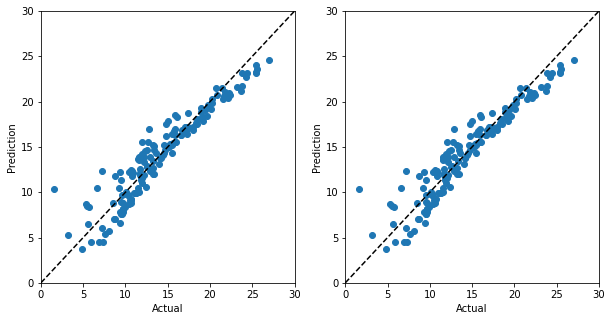

In [38]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
ax[0].plot([0, 30], [0, 30], "--k")

ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Prediction")
ax[0].set_xlim(0, 30)
ax[0].set_ylim(0, 30)

ax[1].scatter(summary_train_ols_pred["actual"], summary_train_ols_pred["prediction"])
ax[1].plot([0, 30], [0, 30], "--k")

ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Prediction")
ax[1].set_xlim(0, 30)
ax[1].set_ylim(0, 30)

plt.show()

In [39]:
# Cari MSE
prediction_train_ols_mse = mean_squared_error(y_train_pred_ols, y_train)
print(prediction_train_ols_mse)

2.937624677304987


In [40]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_train_ols_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 88.74 %


Apa harus dinormalisasi?
Lakukan standardisasi X_train & X_test

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# Buat objek scaler
scaler = StandardScaler()

# Fit pada data train
scaler.fit(X_train)

StandardScaler()

In [43]:
# Transform scaler pada X_train & X_test
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled.index = X_train.index

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns
X_test_scaled.index = X_test.index

In [44]:
# lakukan fitting

# Buat objek
lr_scaled = LinearRegression()

In [45]:
# Lakukan cross validation
from sklearn.model_selection import cross_val_score

In [46]:
scores = cross_val_score(estimator = lr_scaled,
                         X = X_train_scaled,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

In [47]:
scores

array([-1.95519805, -5.9288142 , -2.14412184, -3.06528874, -2.98933228])

In [48]:
lr_scaled_cv_scores = - np.mean(scores)
print(lr_scaled_cv_scores)

3.2165510231407226


In [49]:
# Lakukan Fitting Data
lr_scaled.fit(X = X_train_scaled,
              y = y_train)

LinearRegression()

In [50]:
# Buat prediksi
y_scaled_pred = lr_scaled.predict(X_train_scaled)

In [51]:
summary_train_scaled_pred = pd.DataFrame({"actual": y_train,
                                          "prediction": y_scaled_pred})

summary_train_scaled_pred.head()

,actual,prediction
24,9.7,8.103212
150,16.1,18.290549
114,14.6,15.197324
33,17.4,18.763145
23,15.5,16.468096


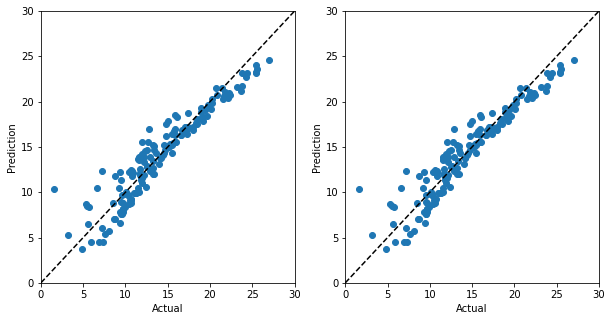

In [52]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
ax[0].plot([0, 30], [0, 30], "--k")

ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Prediction")
ax[0].set_xlim(0, 30)
ax[0].set_ylim(0, 30)

ax[1].scatter(summary_train_scaled_pred["actual"], summary_train_scaled_pred["prediction"])
ax[1].plot([0, 30], [0, 30], "--k")

ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Prediction")
ax[1].set_xlim(0, 30)
ax[1].set_ylim(0, 30)

plt.show()

In [53]:
# Cari MSE
prediction_train_scaled_mse = mean_squared_error(y_scaled_pred, y_train)
print(prediction_train_scaled_mse)

2.9376246773049877


In [54]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_train_scaled_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 88.74 %


In [55]:
# Koefisien/slope linear regression
lr_scaled.coef_

array([ 3.90372233,  2.7816998 , -0.01399175])

In [56]:
# Intercept linear regression
lr_scaled.intercept_

14.095000000000002